# Predicting JunD binding

In [1]:
#!pip install rpy2
#!pip install tzlocal
#!conda install --yes -c bioconda bedtools samtools
#!conda install --yes r-ggplot2

In [2]:
import os
%load_ext rpy2.ipython

from IPython.display import Image

In [3]:
datadir = '../data'
outputdir = '../jund_results'

In [4]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

Run a grid search for a DNA only model.
(Since the following parts are rather time consuming, they will be reran only if you remove the hashtags).

In [5]:
!python dna_only.py -inputpath {datadir} -path {outputdir}

Using TensorFlow backend.
####################
Test effect of scanning single or both strands and higher-order motifs
dna_o3_d0.0_run_5_1
loading from bed lazy loader
Loading bed files |################################| 1/1
reload ../jund_results/datasets/peaks/0df834fb6815c5d788aa3d2f80ba2e20a39b98460028736ef70c0cc249c24041.npz
Traceback (most recent call last):
  File "dna_only.py", line 65, in <module>
    res = objective(shared_space)
  File "/data/akalin/wkopp/usecase_janggu/01_jund_prediction/model_utils.py", line 105, in objective
    train_data, val_data, test_data = get_data(params)
  File "/data/akalin/wkopp/usecase_janggu/01_jund_prediction/data_utils.py", line 40, in get_data
    LABELS, LABELS_TEST = split_train_test(LABELS, 'chr3')
  File "/data/akalin/wkopp/janggu/src/janggu/data/__init__.py", line 152, in split_train_test
    train, test = split_train_test_(datasets, holdout_chroms)
  File "/data/akalin/wkopp/janggu/src/janggu/data/__init__.py", line 109, in split_train

Run a grid search on a DNase only model

In [6]:
!python dnase_only.py -inputpath {datadir} -path {outputdir}

Using TensorFlow backend.
####################
Test effect of DNASE on BAM files (region width and normalization)
dnase_run_tpm_orient_7_1
reload ../jund_results/datasets/peaks/0df834fb6815c5d788aa3d2f80ba2e20a39b98460028736ef70c0cc249c24041.npz
Traceback (most recent call last):
  File "dnase_only.py", line 58, in <module>
    res = objective(shared_space)
  File "/data/akalin/wkopp/usecase_janggu/01_jund_prediction/model_utils.py", line 105, in objective
    train_data, val_data, test_data = get_data(params)
  File "/data/akalin/wkopp/usecase_janggu/01_jund_prediction/data_utils.py", line 40, in get_data
    LABELS, LABELS_TEST = split_train_test(LABELS, 'chr3')
  File "/data/akalin/wkopp/janggu/src/janggu/data/__init__.py", line 152, in split_train_test
    train, test = split_train_test_(datasets, holdout_chroms)
  File "/data/akalin/wkopp/janggu/src/janggu/data/__init__.py", line 109, in split_train_test_
    traindata = view(dataset, exclude_regions=holdout_chroms)
TypeError: vie

Fit models that use DNA and DNase as input simultaneously

In [7]:
!python dnase_dna_model.py -inputpath {datadir} -path {outputdir}

Using TensorFlow backend.
####################
Fitting combined models ...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2019-07-04 02:15:01.658322: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2019-07-04 02:15:01.666551: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2194940000 Hz
2019-07-04 02:15:01.669505: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x561840966c40 executing computations on platform Host. Devices:
2019-07-04 02:15:01.669524: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-07-04 02:15:01.936303: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5618409e6600 executing computations on platform CUDA

Illustrate an example genomic locus

Input, ground truth and predictions

In [8]:
Image(os.path.join(outputdir, 'jund_input_outout_line.png'))

FileNotFoundError: No such file or directory: '../jund_results/jund_input_outout_line.png'

FileNotFoundError: No such file or directory: '../jund_results/jund_input_outout_line.png'

<IPython.core.display.Image object>

Illustration of input feature importance discovered by integrated gradients

In [9]:
Image(os.path.join(outputdir, 'jund_input_attribution_dna.png'))

FileNotFoundError: No such file or directory: '../jund_results/jund_input_attribution_dna.png'

FileNotFoundError: No such file or directory: '../jund_results/jund_input_attribution_dna.png'

<IPython.core.display.Image object>

The following figures illustrate the performances obtained from the grid search runs.

In [10]:
results = os.path.join(outputdir, 'dna_gridsearch_5.tsv')

  Group.1 Group.2         x
1     0.0       1 0.3761537
2     0.2       1 0.3264588
3     0.0       2 0.4169936
4     0.2       2 0.4569217
5     0.0       3 0.4423394
6     0.2       3 0.4810056


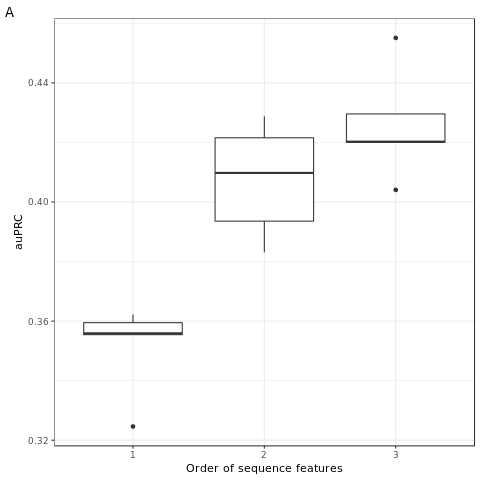

In [11]:
%%R -i results

dna = read.table(results)
print(aggregate(dna[,2], list(dna[,3], dna[,4]), median))

g1 = ggplot(subset(dna, dropout==0.0), aes(x=as.factor(order), y=auprc_val)) + geom_boxplot() + xlab("Order of sequence features") + ylab("auPRC") + theme_bw() +labs(tag="A")
print(g1)

In [12]:
figure = os.path.join(outputdir, 'dna_gridsearch.png')

#%R -i figure ggsave(figure, height=4, width=3)

In [13]:
figure = os.path.join(outputdir, 'dna_gridsearch_drop.png')

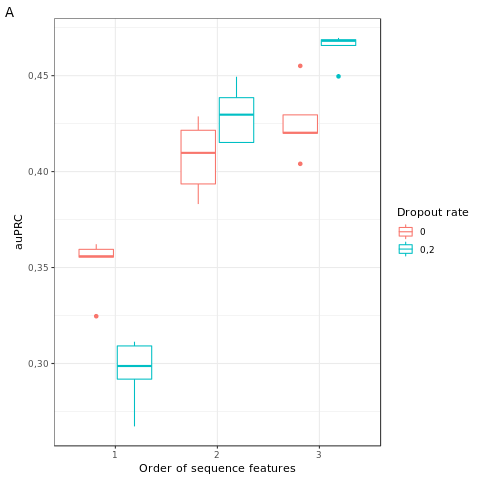

In [14]:
%%R -i figure
g1 = ggplot(dna, aes(x=as.factor(order), y=auprc_val, color=as.factor(dropout))) + 
   geom_boxplot() + xlab("Order of sequence features") + 
    ylab("auPRC") + guides(color=guide_legend(title="Dropout rate")) + 
    theme_bw() + labs(tag="A")
print(g1)
#ggsave(figure, height=4, width=3)


In [15]:
dnaseresults = os.path.join(outputdir, "dnase_gridsearch_7.tsv")

In [16]:
%%R -i dnaseresults

dnase = read.table(dnaseresults, stringsAsFactors = F)
dnase$augment[dnase$augment=="orient"] = "Flip orientation"
dnase$augment[dnase$augment=="none"] = "None"
dnase$normalize[dnase$normalize=="tpm"] = "TPM"
dnase$normalize[dnase$normalize=="none"] = "None"
dnase$normalize[dnase$normalize=="zscorelog"] = "Z-score of log-counts"



In [17]:
figure = os.path.join(outputdir, "/dnase_gridsearch.png")

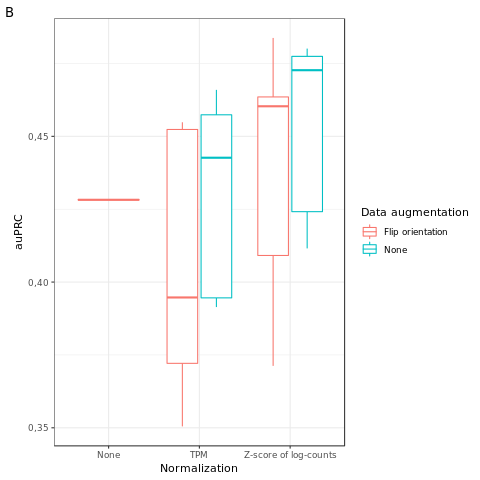

In [18]:
%%R -i figure
g2=ggplot(subset(dnase, normalize!="zscore"), aes(x=normalize, y=auprc_test, color=augment)) + 
 geom_boxplot() + xlab("Normalization") + 
  ylab("auPRC") + 
  guides(color=guide_legend(title="Data augmentation")) + theme_bw() +   labs(tag="B")
print(g2)
#ggsave(figure, height=4, width=6)


In [19]:
randres =  os.path.join(outputdir, "dnase_dna_use_randominit_submodels.tsv")

In [20]:
%R -i randres df = read.table(randres, stringsAsFactors = F)

R[write to console]: Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> read.table -> file

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(file, "rt") :
R[write to console]: 
 
R[write to console]:  cannot open file '../jund_results/dnase_dna_use_randominit_submodels.tsv': No such file or directory




Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> read.table -> file


In [21]:
figure =  os.path.join(outputdir, "dna_dnase_joint.png")

In [22]:
%%R -i figure

df$init = ""

g3 <- ggplot(df, aes(x=init, y=auprc_test)) + geom_boxplot() +  xlab("Combined model") + ylab("auPRC") + theme_bw() + labs(tag="C")

print(g3)
#ggsave(figure, height=4, width=2)

R[write to console]: Error in df$init = "" : object of type 'closure' is not subsettable
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in df$init = "" : object of type 'closure' is not subsettable
Calls: <Anonymous> -> <Anonymous> -> withVisible
